In [2]:
# ขั้นตอนที่ 1 ติดตั้งไลบรารีที่จำเป็น

วรินทร แสงภักดิ์ 640710757

In [3]:
!pip install osmnx==1.9.1 folium -q

In [4]:
# ขั้นตอนที่ 2 Import และตั้งค่าพื้นฐาน

In [5]:
import osmnx as ox
import networkx as nx
import folium
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [6]:
ox.settings.use_cache = True
ox.settings.log_console = False

In [7]:
print(f"OSMnx version: {ox.__version__}")
print(f"NetworkX version: {nx.__version__}")

OSMnx version: 1.9.1
NetworkX version: 3.3


In [8]:
# ขั้นตอนที่ 3 ดึงข้อมูลแผนที่นครปฐม

In [9]:
place_name = "Nakhon Pathom, Thailand"

- Nodes (intersections): 50,479
- Edges (street segments): 115,362


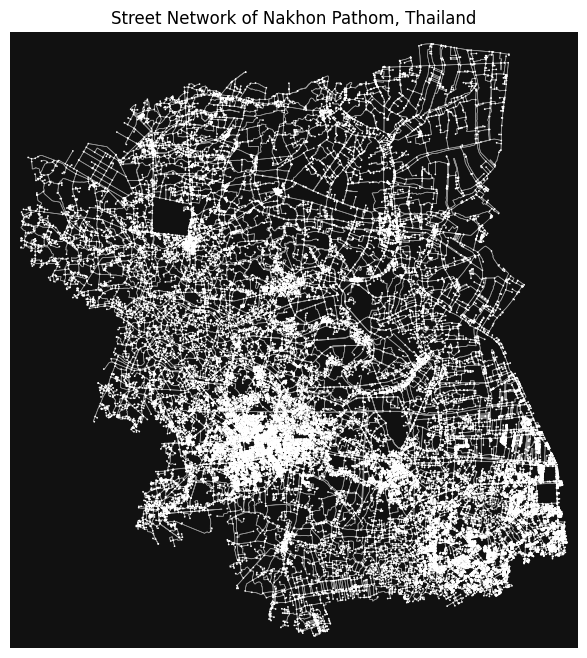

In [10]:
try:
    # ดึงข้อมูลเครือข่ายถนนสำหรับการขับรถ
    G = ox.graph_from_place(place_name, network_type='drive')

    print(f"- Nodes (intersections): {G.number_of_nodes():,}")
    print(f"- Edges (street segments): {G.number_of_edges():,}")

    fig, ax = ox.plot_graph(G, node_size=1.5, edge_linewidth=0.5, show=False, close=False)
    plt.title(f"Street Network of {place_name}")
    plt.show()

except Exception as e:
    print(f"Error downloading map data: {e}")

In [11]:
# ขั้นตอนที่ 4 สำรวจข้อมูลเบื้องต้น

In [12]:
import pandas as pd

# แปลงกราฟ G เป็น GeoDataFrame ของ edges (เส้นถนน)
edges = ox.graph_to_gdfs(G, nodes=False)

# แสดงตัวอย่างข้อมูลถนน 5 แถว
print("🔍 Sample street data (first 5 streets):")
print(edges[['name', 'highway', 'length']].head())

# แสดงจำนวนถนนแต่ละประเภท (เช่น residential, primary, etc.)
print("\n📊 Types of roads in our graph (flattened):")
highway_series = edges['highway'].explode()  # กรณีมีหลายประเภทในเส้นเดียว
highway_counts = highway_series.value_counts()
print(highway_counts.head(10))

# แสดงข้อมูลสถิติเบื้องต้นของความยาวถนน
print("\n📏 Road length statistics:")
print(edges['length'].describe())


🔍 Sample street data (first 5 streets):
                                   name       highway   length
u         v          key                                      
268631349 2286455597 0              NaN  primary_link   13.649
          8556088500 0    ถนนเศรษฐกิจ 2       primary   12.658
268631389 2286464669 0              NaN   residential   38.865
          2286437642 0    ถนนเศรษฐกิจ 2       primary   42.632
268631499 8508809475 0    ถนนเศรษฐกิจ 2       primary  608.453

📊 Types of roads in our graph (flattened):
highway
residential       87932
unclassified      15367
tertiary           7191
secondary          2565
primary            1172
trunk               594
primary_link        150
trunk_link          150
secondary_link      145
tertiary_link       125
Name: count, dtype: int64

📏 Road length statistics:
count    115362.000000
mean        172.039304
std         249.231913
min           1.008000
25%          42.645000
50%          88.713000
75%         198.547000
max       111

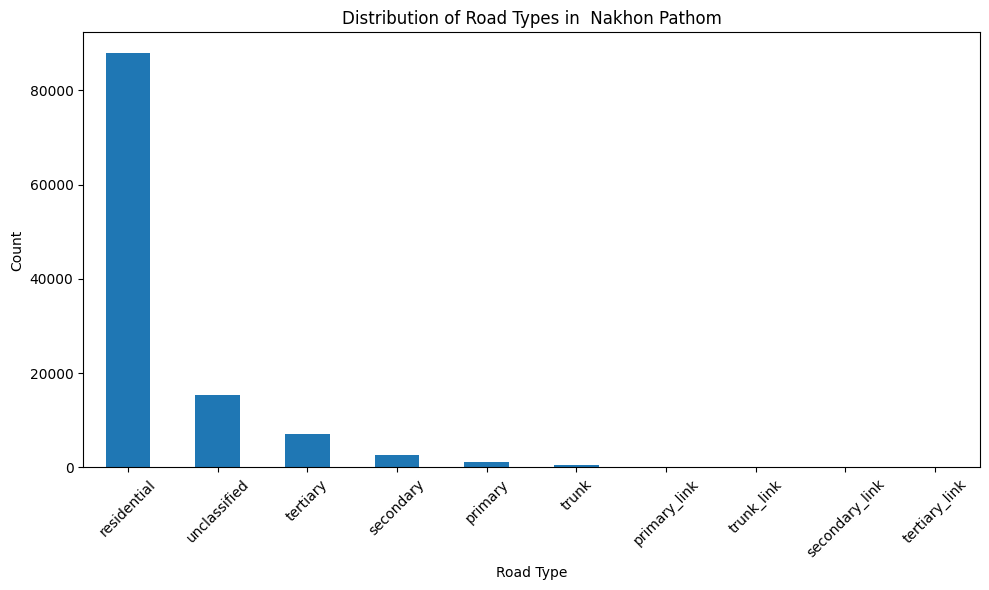

In [13]:
plt.figure(figsize=(10, 6))
highway_counts.head(10).plot(kind='bar')
plt.title("Distribution of Road Types in  Nakhon Pathom")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# ขั้นตอนที่ 5 กำหนดจุดเริ่มต้นและปลายทาง หอพักมามหาลัยศิลปากรนครปฐม

In [15]:
start_lat, start_lon = 13.8021, 100.5538
start_name = "The Matrix Condo"

In [16]:
end_lat, end_lon = 13.7992, 100.5489
end_name = "Silpakorn University"

In [17]:
#  หาโหนดที่ใกล้ที่สุดบนกราฟ
orig_node = ox.nearest_nodes(G, start_lon, start_lat)
dest_node = ox.nearest_nodes(G, end_lon, end_lat)

print(f"🚶 Starting point: {start_name}")
print(f"   Node ID: {orig_node}")
print(f"🎯 Destination: {end_name}")
print(f"   Node ID: {dest_node}")

🚶 Starting point: The Matrix Condo
   Node ID: 3872562965
🎯 Destination: Silpakorn University
   Node ID: 3872562965


In [18]:
if nx.has_path(G, orig_node, dest_node):
    print("Path exists between origin and destination!")
else:
    print("No path found! Try different locations.")

Path exists between origin and destination!


In [19]:
# ขั้นตอนที่ 6 หาเส้นทางที่สั้นที่สุดด้วย A*

In [20]:
try:
    # ใช้ A* algorithm หาเส้นทางที่สั้นที่สุด (ตามระยะทาง)
    shortest_route = nx.astar_path(G, orig_node, dest_node, weight='length')

    # คำนวณระยะทางรวม
    route_length = nx.path_weight(G, shortest_route, weight='length')

    print(f"✅ Shortest route found!")
    print(f"📏 Total distance: {route_length:,.0f} meters ({route_length/1000:.2f} km)")
    print(f"🔢 Number of intersections: {len(shortest_route)}")

except nx.NetworkXNoPath:
    print("❌ No path found between these locations!")
except Exception as e:
    print(f"❌ Error: {e}")

✅ Shortest route found!
📏 Total distance: 0 meters (0.00 km)
🔢 Number of intersections: 1


In [21]:
# ขั้นตอนที่ 7 แสดงผลเส้นทางบนแผนที่ Interactive

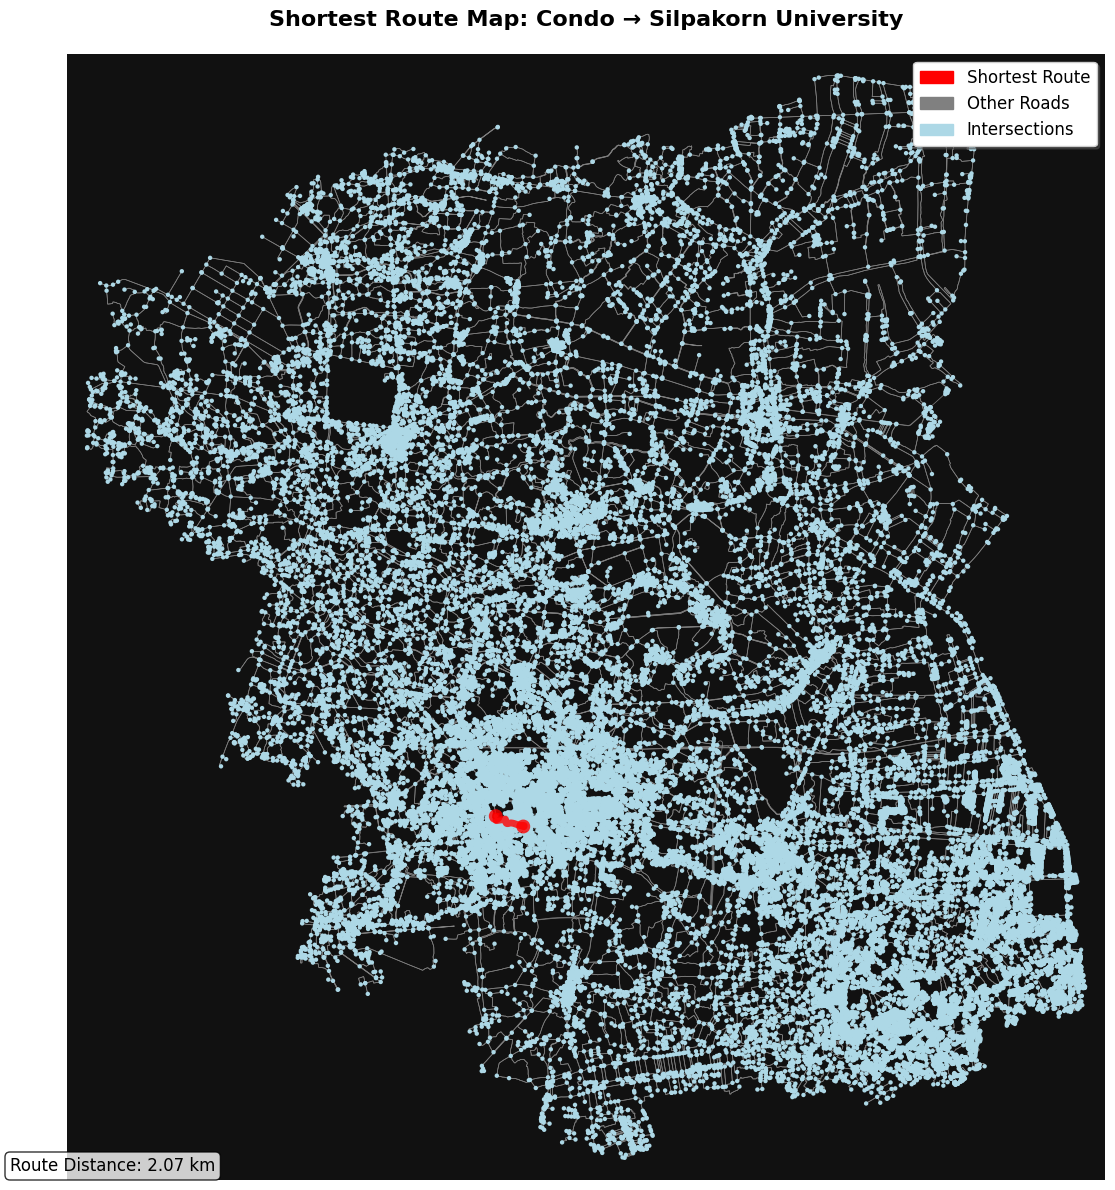

📌 Number of nodes in route: 36
📏 Total distance: 2.07 km
✅ Route visualization completed!


In [22]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display

# 1. โหลดข้อมูลถนนนครปฐม
place_name = "Nakhon Pathom, Thailand"
G = ox.graph_from_place(place_name, network_type='drive')

# 2. พิกัดต้นทาง-ปลายทาง
origin_point = (13.8114342, 100.0544382)       # คอนโด
destination_point = (13.8169023, 100.0421047)  # ม.ศิลปากร

# 3. หาโหนดที่ใกล้พิกัดมากที่สุด
orig_node = ox.distance.nearest_nodes(G, X=origin_point[1], Y=origin_point[0])
dest_node = ox.distance.nearest_nodes(G, X=destination_point[1], Y=destination_point[0])

# 4. คำนวณเส้นทางที่สั้นที่สุด
shortest_route = nx.shortest_path(G, orig_node, dest_node, weight="length")

# 5. วาดแผนที่พร้อม legend
fig, ax = ox.plot_graph_route(
    G, shortest_route,
    route_color='red',
    route_linewidth=5,
    route_alpha=0.8,
    node_color='lightblue',
    node_size=10,
    edge_color='gray',
    edge_linewidth=0.5,
    figsize=(12, 12),
    show=False,
    close=False
)

# 6. เพิ่ม legend
red_line = mpatches.Patch(color='red', label='Shortest Route')
gray_line = mpatches.Patch(color='gray', label='Other Roads')
blue_dot = mpatches.Patch(color='lightblue', label='Intersections')

ax.legend(handles=[red_line, gray_line, blue_dot], 
          loc='upper right', 
          fontsize=12,
          frameon=True,
          fancybox=True,
          shadow=True)

# 7. ชื่อแผนที่
plt.title('Shortest Route Map: Condo → Silpakorn University', fontsize=16, fontweight='bold', pad=20)

# 8. คำนวณระยะทาง
try:
    route_gdf = ox.utils_graph.route_to_gdf(G, shortest_route)
    route_length = route_gdf['length'].sum()
    route_length_km = route_length / 1000

    # 9. แสดงระยะทางบนแผนที่
    plt.figtext(0.02, 0.02, f'Route Distance: {route_length_km:.2f} km', 
                fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
except:
    print("Could not calculate route distance")

# 10. แสดงผล
plt.tight_layout()
plt.show()

# 11. ข้อมูลเพิ่มเติม
print(f"📌 Number of nodes in route: {len(shortest_route)}")
if 'route_length_km' in locals():
    print(f"📏 Total distance: {route_length_km:.2f} km")
print("✅ Route visualization completed!")


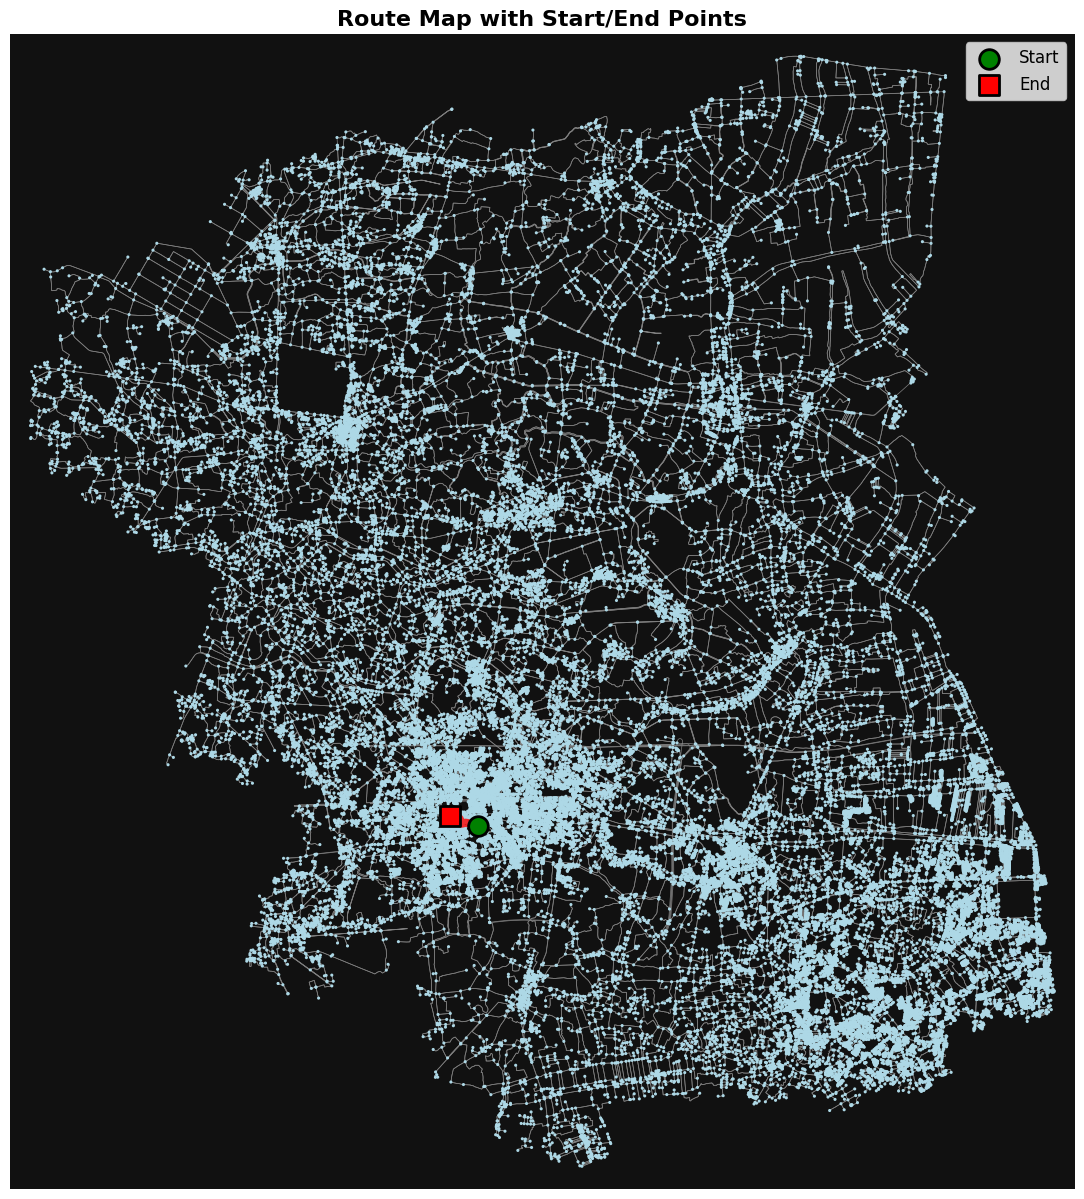

In [23]:
# ใช้แผนที่แบบ static (ไม่ต้อง trust)
import matplotlib.pyplot as plt
import osmnx as ox

# สร้างแผนที่ static พร้อม markers
fig, ax = ox.plot_graph_route(G, shortest_route, 
                              route_color='red',
                              route_linewidth=6,
                              route_alpha=0.8,
                              node_color='lightblue',
                              node_size=5,
                              edge_color='gray',
                              edge_linewidth=0.5,
                              figsize=(15, 15),
                              show=False,
                              close=False)

# เพิ่ม start/end points
start_node = shortest_route[0]
end_node = shortest_route[-1]

start_x, start_y = G.nodes[start_node]['x'], G.nodes[start_node]['y']
end_x, end_y = G.nodes[end_node]['x'], G.nodes[end_node]['y']

# เพิ่ม markers
ax.scatter(start_x, start_y, c='green', s=200, marker='o', zorder=5, label='Start', edgecolor='black', linewidth=2)
ax.scatter(end_x, end_y, c='red', s=200, marker='s', zorder=5, label='End', edgecolor='black', linewidth=2)

# เพิ่ม legend
ax.legend(loc='upper right', fontsize=12)
plt.title('Route Map with Start/End Points', fontsize=16, fontweight='bold')

plt.show()

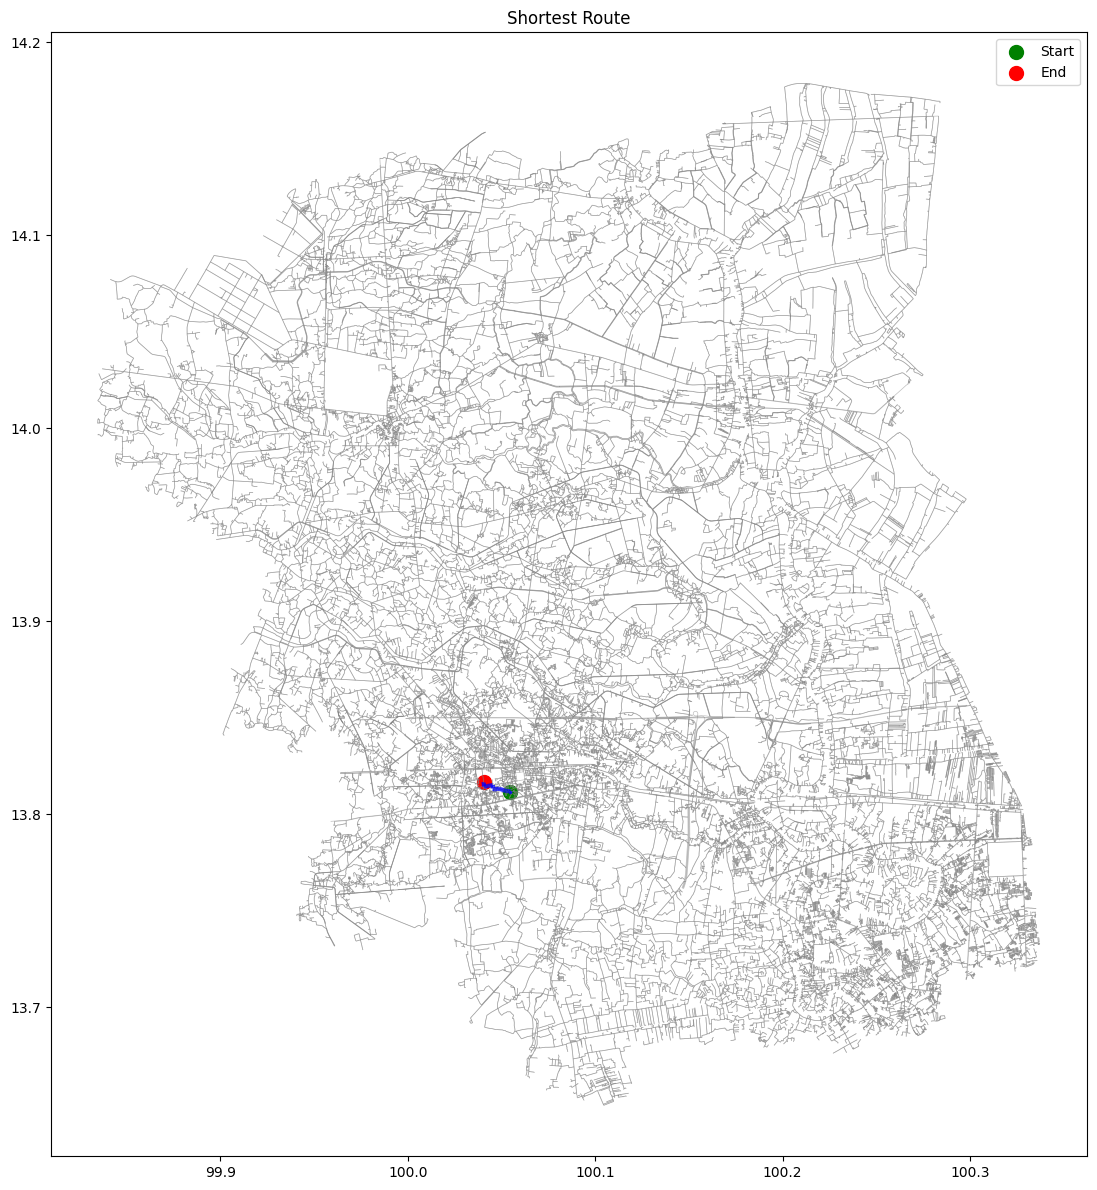

In [24]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

# หาเส้นทางที่สั้นที่สุด
route = nx.shortest_path(G, orig_node, dest_node, weight='length')

# แปลงเป็น GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G)

# สร้าง route edges
route_edges = []
for i in range(len(route)-1):
    u, v = route[i], route[i+1]
    # หา edge ที่ตรงกัน
    edge_data = G[u][v]
    if len(edge_data) > 1:
        # ถ้ามีหลาย edge ให้เลือก key แรก
        key = min(edge_data.keys())
    else:
        key = 0
    route_edges.append((u, v, key))

# กรอง edges ที่อยู่ในเส้นทาง
route_gdf = edges.loc[route_edges]

# วาดแผนที่
fig, ax = plt.subplots(figsize=(12, 12))

# วาด street network
edges.plot(ax=ax, linewidth=0.5, color='gray', alpha=0.5)

# วาดเส้นทาง
route_gdf.plot(ax=ax, linewidth=3, color='blue', alpha=0.8)

# วาด nodes เริ่มต้นและปลายทาง
nodes.loc[[orig_node]].plot(ax=ax, color='green', markersize=100, label='Start')
nodes.loc[[dest_node]].plot(ax=ax, color='red', markersize=100, label='End')

plt.title('Shortest Route')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# ขั้นตอนที่ 8 วิเคราะห์เส้นทาง

In [26]:
route_edges = ox.utils_graph.route_to_gdf(G, shortest_route, weight='length')

print("📊 Route Analysis:")
print(f"Total segments: {len(route_edges)}")
print(f"\n🛣️ Street names used:")

# รวบรวมชื่อถนนที่ใช้ (ไม่ซ้ำ)
street_names = route_edges['name'].dropna().unique()
for i, street in enumerate(street_names, 1):
    print(f"   {i}. {street}")

# แสดงประเภทถนนที่ใช้
print(f"\n🚗 Road types used:")
road_types = route_edges['highway'].value_counts()
for road_type, count in road_types.items():
    print(f"   - {road_type}: {count} segments")

📊 Route Analysis:
Total segments: 35

🛣️ Street names used:
   1. ถนน ราชมรรคา
   2. ถนนยิงเป้า
   3. ถนนทรงพล
   4. ถนนสนามจันทร์

🚗 Road types used:
   - tertiary: 25 segments
   - secondary: 7 segments
   - unclassified: 2 segments
   - residential: 1 segments


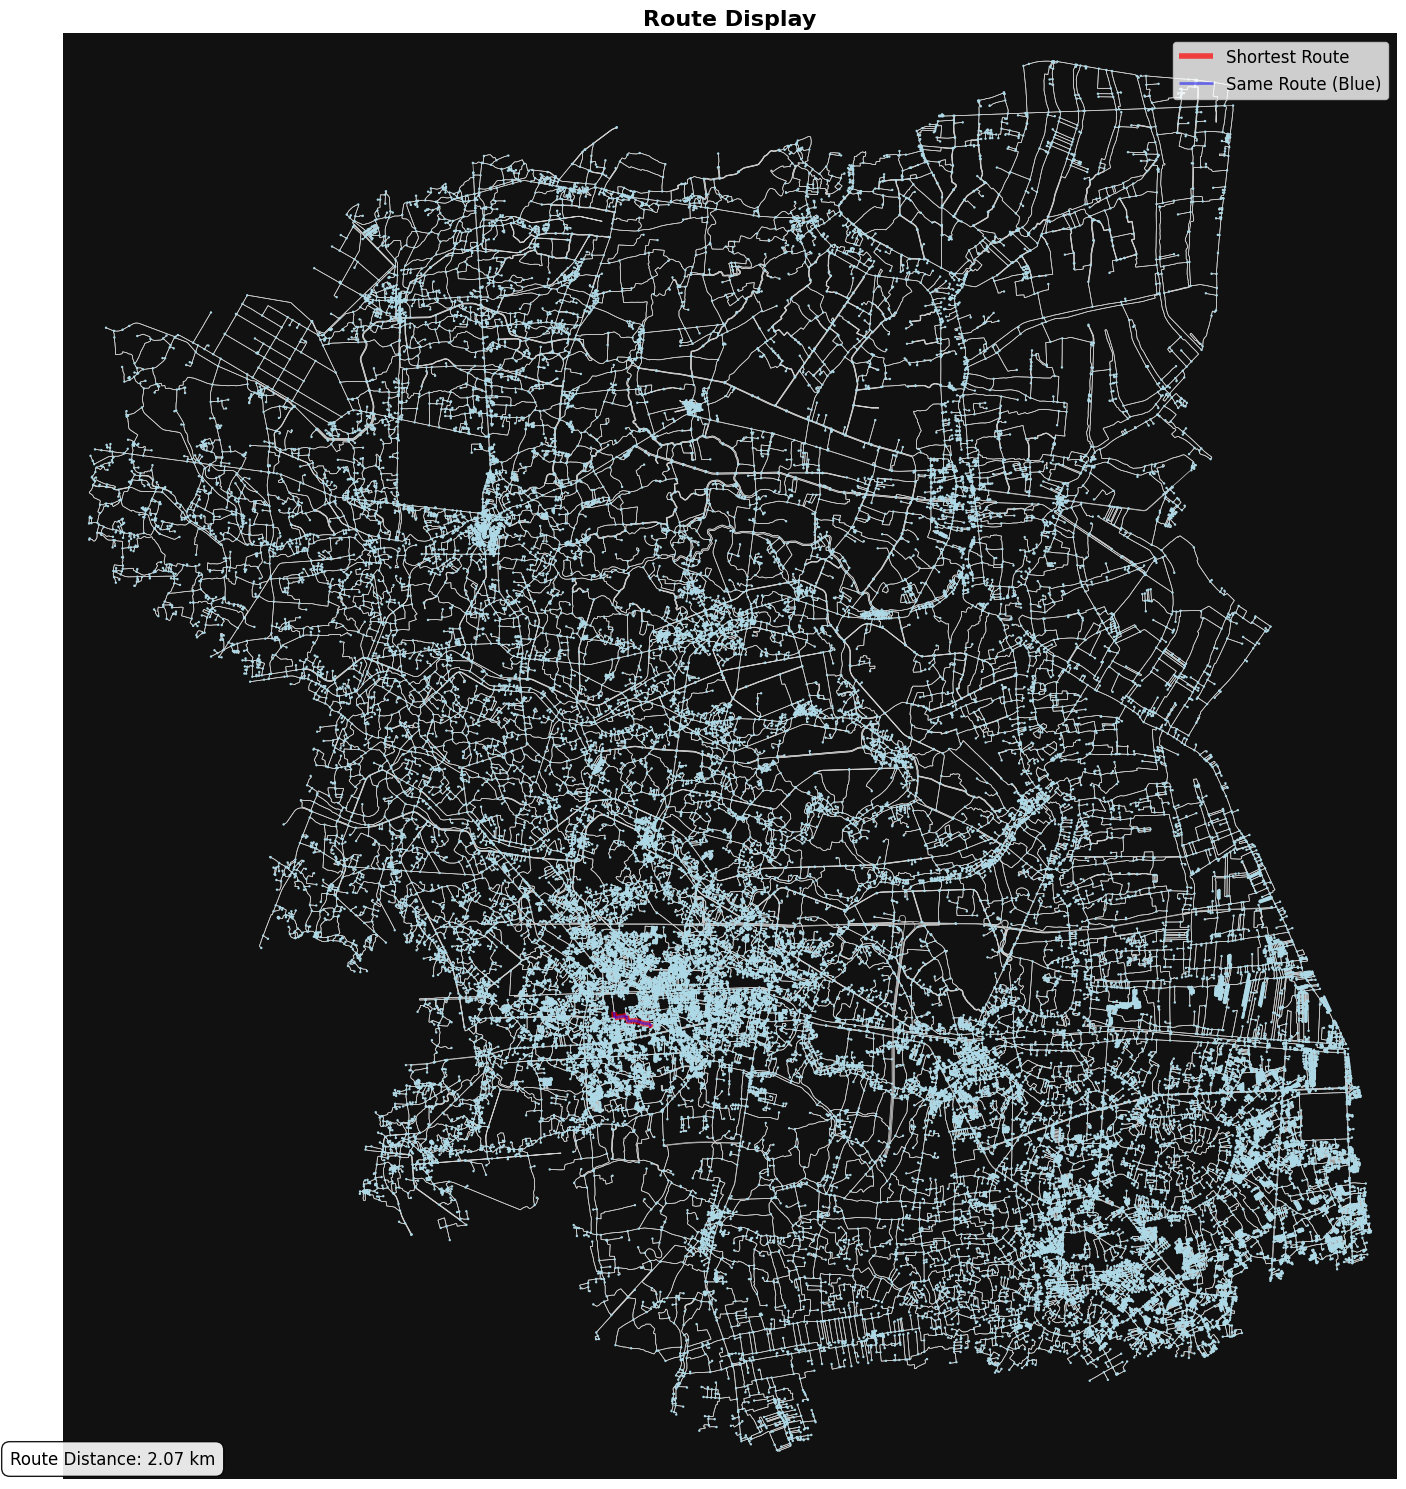

Route visualization completed!
Route distance: 2.07 km


In [27]:
# แทนที่โค้ดเดิม ใช้ matplotlib แทน folium
import matplotlib.pyplot as plt
import osmnx as ox

# สร้างแผนที่พื้นฐาน
fig, ax = ox.plot_graph(G, 
                       node_color='lightblue',
                       node_size=3,
                       edge_color='lightgray',
                       edge_linewidth=0.5,
                       figsize=(15, 15),
                       show=False,
                       close=False)

# Plot shortest route (แดง)
route1_edges = ox.utils_graph.route_to_gdf(G, route)  # ใช้ route แทน shortest_route
route1_edges.plot(ax=ax, color='red', linewidth=4, alpha=0.7, label='Shortest Route')

# Plot เส้นทางเดียวกันอีกครั้งด้วยสีน้ำเงิน (ถ้าต้องการแสดง 2 สี)
route2_edges = ox.utils_graph.route_to_gdf(G, route)  # เปลี่ยนจาก new_route เป็น route
route2_edges.plot(ax=ax, color='blue', linewidth=2, alpha=0.5, label='Same Route (Blue)')

# หรือถ้าไม่ต้องการแสดง 2 สี ให้ลบส่วนนี้ออก
# route2_edges = ox.utils_graph.route_to_gdf(G, route)
# route2_edges.plot(ax=ax, color='blue', linewidth=2, alpha=0.5, label='Same Route (Blue)')

# เพิ่ม legend
ax.legend(loc='upper right', fontsize=12)
plt.title('Route Display', fontsize=16, fontweight='bold')  # เปลี่ยน title

# แสดงระยะทาง
route1_length = route1_edges['length'].sum() / 1000
route2_length = route1_length  # เป็นเส้นทางเดียวกัน

plt.figtext(0.02, 0.02, 
           f'Route Distance: {route1_length:.2f} km', 
           fontsize=12, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9))

plt.tight_layout()
plt.show()

print(f"Route visualization completed!")
print(f"Route distance: {route1_length:.2f} km")

/tmp/ipykernel_47053/537480190.py:53: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47053/537480190.py:53: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47053/537480190.py:53: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47053/537480190.py:53: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47053/537480190.py:53: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47053/537480190.py:53: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47053/537480190.py:53: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  plt.tight

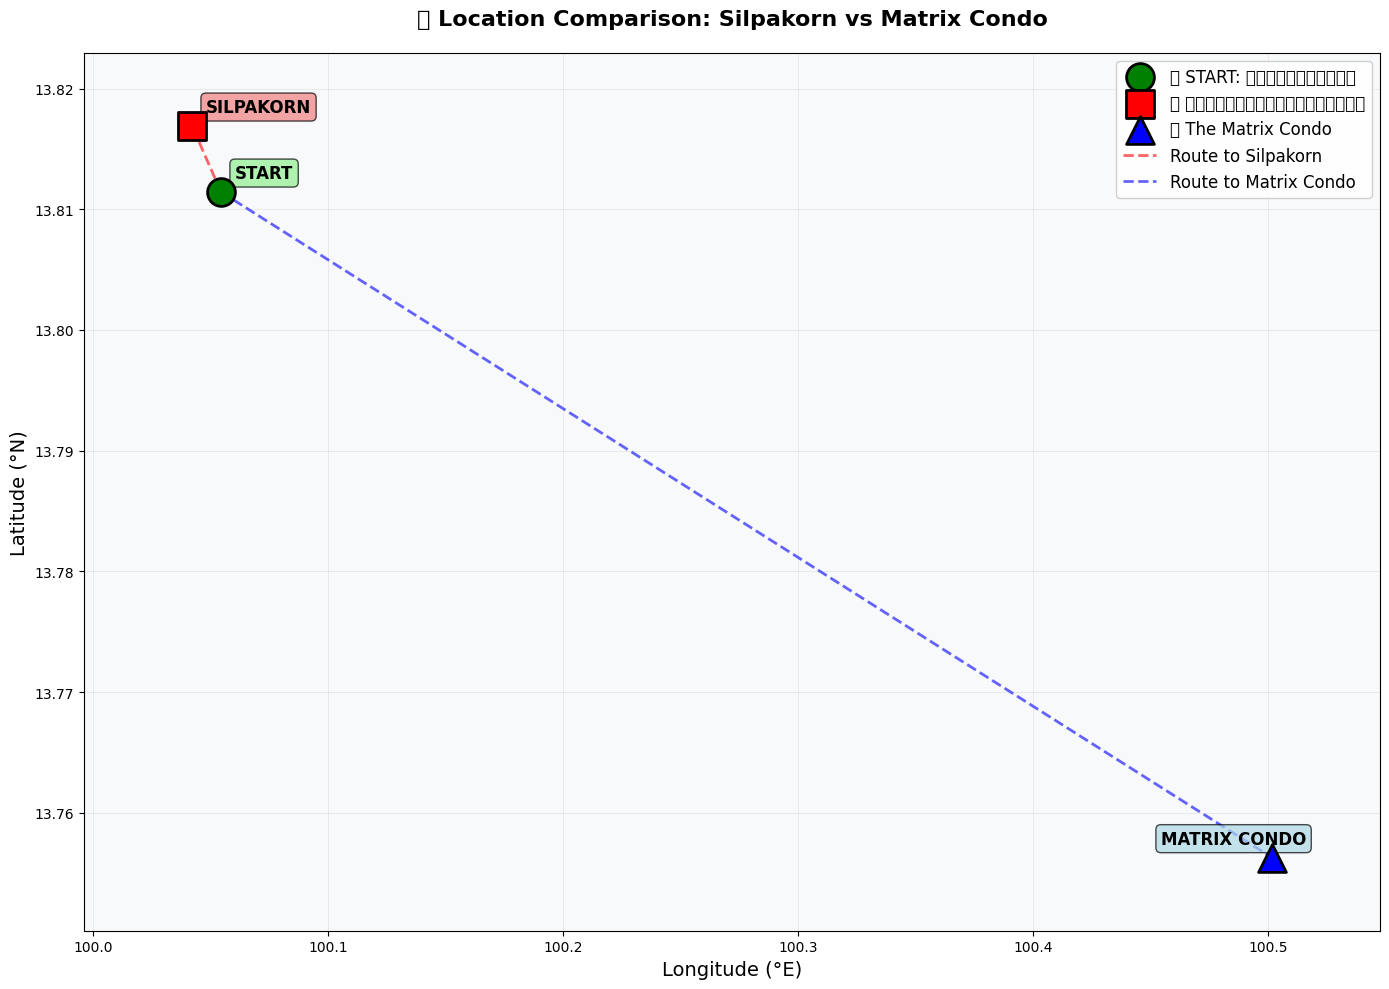


📏 DISTANCE COMPARISON (Straight-line)
🔴 To มหาวิทยาลัยศิลปากร: 1.46 km
🔵 To The Matrix Condo: 48.70 km
💡 Difference: 47.24 km
✅ มหาวิทยาลัยศิลปากร ใกล้กว่า 47.24 km

📍 COORDINATES:
🟢 Start: 13.811434, 100.054438
🔴 Silpakorn: 13.816902, 100.042105
🔵 Matrix Condo: 13.756300, 100.501800


In [31]:
import matplotlib.pyplot as plt
import math

# พิกัดสถานที่
start_lat, start_lon = 13.8114342, 100.0544382
end_lat, end_lon = 13.8169023, 100.0421047
new_end_lat, new_end_lon = 13.7563, 100.5018

# สร้างแผนที่
fig, ax = plt.subplots(figsize=(14, 10))

# Plot จุดต่างๆ
ax.scatter(start_lon, start_lat, c='green', s=400, marker='o', 
           label='🟢 START: จุดเริ่มต้น', zorder=5, edgecolors='black', linewidth=2)
ax.scatter(end_lon, end_lat, c='red', s=400, marker='s', 
           label='🔴 มหาวิทยาลัยศิลปากร', zorder=5, edgecolors='black', linewidth=2)
ax.scatter(new_end_lon, new_end_lat, c='blue', s=400, marker='^', 
           label='🔵 The Matrix Condo', zorder=5, edgecolors='black', linewidth=2)

# เพิ่มเส้นเชื่อมจากจุดเริ่มต้น
ax.plot([start_lon, end_lon], [start_lat, end_lat], 'r--', alpha=0.6, linewidth=2, label='Route to Silpakorn')
ax.plot([start_lon, new_end_lon], [start_lat, new_end_lat], 'b--', alpha=0.6, linewidth=2, label='Route to Matrix Condo')

# เพิ่มข้อความบอกตำแหน่ง
ax.annotate('START', (start_lon, start_lat), xytext=(10, 10), 
            textcoords='offset points', fontsize=12, fontweight='bold', 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
ax.annotate('SILPAKORN', (end_lon, end_lat), xytext=(10, 10), 
            textcoords='offset points', fontsize=12, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
ax.annotate('MATRIX CONDO', (new_end_lon, new_end_lat), xytext=(-80, 10), 
            textcoords='offset points', fontsize=12, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

# ตั้งค่าแกน
ax.set_xlabel('Longitude (°E)', fontsize=14)
ax.set_ylabel('Latitude (°N)', fontsize=14)
ax.set_title('📍 Location Comparison: Silpakorn vs Matrix Condo', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# กำหนดขอบเขตแผนที่ให้เหมาะสม
all_lons = [start_lon, end_lon, new_end_lon]
all_lats = [start_lat, end_lat, new_end_lat]
margin_lon = (max(all_lons) - min(all_lons)) * 0.1
margin_lat = (max(all_lats) - min(all_lats)) * 0.1
ax.set_xlim(min(all_lons) - margin_lon, max(all_lons) + margin_lon)
ax.set_ylim(min(all_lats) - margin_lat, max(all_lats) + margin_lat)

# เพิ่มพื้นหลังสี
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# คำนวณระยะทางแบบเส้นตรง
def haversine_distance(lat1, lon1, lat2, lon2):
    """คำนวณระยะทางแบบเส้นตรงระหว่าง 2 จุด (Haversine formula)"""
    R = 6371  # รัศมีโลกในหน่วย km
    
    lat1, lat2, lon1, lon2 = map(math.radians, [lat1, lat2, lon1, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    return R * c

# คำนวณระยะทาง
dist_to_silpakorn = haversine_distance(start_lat, start_lon, end_lat, end_lon)
dist_to_matrix = haversine_distance(start_lat, start_lon, new_end_lat, new_end_lon)

print("\n" + "="*60)
print("📏 DISTANCE COMPARISON (Straight-line)")
print("="*60)
print(f"🔴 To มหาวิทยาลัยศิลปากร: {dist_to_silpakorn:.2f} km")
print(f"🔵 To The Matrix Condo: {dist_to_matrix:.2f} km")
print(f"💡 Difference: {abs(dist_to_silpakorn - dist_to_matrix):.2f} km")

if dist_to_silpakorn < dist_to_matrix:
    print(f"✅ มหาวิทยาลัยศิลปากร ใกล้กว่า {dist_to_matrix - dist_to_silpakorn:.2f} km")
else:
    print(f"✅ The Matrix Condo ใกล้กว่า {dist_to_silpakorn - dist_to_matrix:.2f} km")

print("\n📍 COORDINATES:")
print(f"🟢 Start: {start_lat:.6f}, {start_lon:.6f}")
print(f"🔴 Silpakorn: {end_lat:.6f}, {end_lon:.6f}")
print(f"🔵 Matrix Condo: {new_end_lat:.6f}, {new_end_lon:.6f}")
print("="*60)

In [ ]:
help(ox.graph_from_place)

Help on function graph_from_place in module osmnx.graph:

graph_from_place(query, network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, which_result=None, buffer_dist=None, clean_periphery=None, custom_filter=None)
    Download and create a graph within the boundaries of some place(s).

    The query must be geocodable and OSM must have polygon boundaries for the
    geocode result. If OSM does not have a polygon for this place, you can
    instead get its street network using the graph_from_address function,
    which geocodes the place name to a point and gets the network within some
    distance of that point.

    If OSM does have polygon boundaries for this place but you're not finding
    it, try to vary the query string, pass in a structured query dict, or vary
    the which_result argument to use a different geocode result. If you know
    the OSM ID of the place, you can retrieve its boundary polygon using the
    geocode_to_gdf function, then pa

In [ ]:
# ขั้นตอนที่ 10 เพิ่ม "travel time" เป็น weight แทน distance

In [ ]:
# Define estimated travel speeds for different road types in km/h
speed_kmph = {
    'residential': 30,  # Typical speed in residential areas
    'unclassified': 30, # Similar to residential
    'tertiary': 40,     # Medium speed urban roads
    'secondary': 50,    # Arterial roads
    'primary': 60,      # Major urban roads
    'trunk': 70,        # Major highways/expressways within urban area
    'motorway': 90,     # High-speed expressways
    'living_street': 10,# Very low speed
    'service': 20,      # Service roads, alleys
    'road': 30,         # General unclassified roads
    'primary_link': 60, # Links to primary roads
    'secondary_link': 50,# Links to secondary roads
    'tertiary_link': 40, # Links to tertiary roads
    'trunk_link': 70,   # Links to trunk roads
    'motorway_link': 90 # Links to motorways
}

print("Estimated speeds (km/h) by road type")
for highway_type, speed in speed_kmph.items():
    print(f"  {highway_type}: {speed}")

Estimated speeds (km/h) by road type
  residential: 30
  unclassified: 30
  tertiary: 40
  secondary: 50
  primary: 60
  trunk: 70
  motorway: 90
  living_street: 10
  service: 20
  road: 30
  primary_link: 60
  secondary_link: 50
  tertiary_link: 40
  trunk_link: 70
  motorway_link: 90


In [ ]:
# ขั้นตอนที่ 11 คำนวน travel time

In [ ]:
# Convert speed from km/h to meters per second
speed_mps = {highway_type: speed * 1000 / 3600 for highway_type, speed in speed_kmph.items()}

# Add 'speed_mps' attribute to edges based on 'highway' type
G = ox.add_edge_speeds(G, speed_mps)

# Calculate and add 'travel_time' attribute to edges
G = ox.add_edge_travel_times(G)

In [ ]:
# ขั้นตอนที่ 12 shortest path จาก time

In [ ]:
# ใช้ A* algorithm หาเส้นทางที่ใช้เวลาน้อยที่สุด
shortest_route_time = nx.astar_path(G, orig_node, dest_node, weight='travel_time')

# คำนวณเวลาการเดินทางรวม
route_time = nx.path_weight(G, shortest_route_time, weight='travel_time')

print(f"⏰ Estimated total travel time: {route_time:.2f} seconds ({route_time/60:.2f} minutes)")
print(f"Number of intersections: {len(shortest_route_time)}")

⏰ Estimated total travel time: 263.30 seconds (4.39 minutes)
Number of intersections: 14


In [ ]:
# ตัวอย่างการกำหนดความเร็วให้แต่ละเส้นทาง

In [ ]:
# u, v, key คือตัวระบุเส้นถนน และ 'speed_mps_actual' คือความเร็วจริงในหน่วย เมตรต่อวินาที
data = {
    'u': [85753778, 105838415, 105838415, 9444510080, 2197616325],
    'v': [1893839406, 1817818994, 8107214608, 2197616325, 9444510080],
    'key': [0, 0, 0, 0, 0],
    'speed_mps_actual': [15.2, 12.5, 5.0, 10.0, 9.5]
}

df_speeds_actual = pd.DataFrame(data)

display(df_speeds_actual)

u           v  key  speed_mps_actual
0    85753778  1893839406    0              15.2
1   105838415  1817818994    0              12.5
2   105838415  8107214608    0               5.0
3  9444510080  2197616325    0              10.0
4  2197616325  9444510080    0               9.5